<center> <h1>PREDICIÓN DEL SUEÑO CON MLP MULTICLASE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este jupyter notebook se lleva a cabo la construcción de un clasificador MLP de salida multiclase para predecir el el estado de vigilia o sueño ligero y  el de sueño profundo.

    1. Clasficador MLP multiclase
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

IMPORTAR MÓDULOS

In [1]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn

## 1. CLASIFICADOR MLP MULTICLASE

Se ha utilizado un perceptrón multicapa para clasificar las distintas fases del sueño. Es decir, se ha construido un clasificador con salida multiclase.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_multi= pd.read_csv('Train_multiclass.csv')
Test_multi= pd.read_csv('Test_multiclass.csv')

In [3]:
X_train_multi=Train_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_multi=Train_multi['Etiquetas multiclase']

X_test_multi=Test_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_multi=Test_multi['Etiquetas multiclase']

### 1.2  Creación del modelo y selección parámetros libres

Se proponen posibles valores de neuronas en la capa oculta para ver con cuál de ellos se obtienen las mejores prestaciones para el modelo. Se crea una tabla que recoge la pérdidas para cada valor del número de neuronas y aquel que tenga menos pérdida es el que se utilizará para el conjunto de test.

Se estudia el número de neuronas para un rango de 4 a 20 cogiendo los valores con saltos de 3.

In [4]:
# Tabla para recoger las prestaciones en train 
columns  = ['Loss','Score']
comp_train = pd.DataFrame(columns=columns)


In [5]:
# Número de neuronas de la capa oculta
n_hidden=range(4,20,3)

for i in n_hidden:
    
    print('\033[4;32m' + 'MLP clasiffier with',i,'neurons in the hidden layer' + '\033[0m')

    model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=(i,), learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

    model.fit(X_train_multi, y_train_multi)
    
    loss=model.loss_  
    comp_train = comp_train.set_value(i,('Loss','Score'),(loss,'Verbose'))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.184211
Iteration 2, loss = 1.96606338
Validation score: 0.197368
Iteration 3, loss = 2.03654500
Validation score: 0.197368
Iteration 4, loss = 2.05545658
Validation score: 0.184211
Iteration 5, loss = 2.05847225
Validation score: 0.184211
Iteration 6, loss = 2.06004576
Validation score: 0.184211
Iteration 7, loss = 2.05972044
Validation score: 0.184211
Iteration 8, loss = 2.05920661
Validation score: 0.197368
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.210526
Iteration 2, loss = 1.82543870
Validation score: 0.171053
Iteration 3, loss = 1.87033667
Validation score: 0.171053
Iteration 4, loss = 1.88240184
Validation score: 0.171053
Iteration 5, loss = 1.88713580
Validation score: 0.210526
Iteration 6, loss = 1.88446060
Validation score: 0.171053
Iteration 

/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Iteration 4, loss = 1.91937326
Validation score: 0.157895
Iteration 5, loss = 1.92436246
Validation score: 0.157895
Iteration 6, loss = 1.92323241
Validation score: 0.184211
Iteration 7, loss = 1.92586451
Validation score: 0.223684
Iteration 8, loss = 1.92494336
Validation score: 0.184211
Iteration 9, loss = 1.92514175
Validation score: 0.157895
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 16 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.171053
Iteration 2, loss = 34.85745040
Validation score: 0.157895
Iteration 3, loss = 43.51997296
Validation score: 0.157895
Iteration 4, loss = 45.66242495
Validation score: 0.197368
Iteration 5, loss = 46.16210120
Validation score: 0.157895
Iteration 6, loss = 46.27539050
Validation score: 0.157895
Iteration 7, loss = 46.30020181
Validation score: 0.157895
Iteration 8, loss = 46.30206427
Validation score: 0.157895
Iteration 9, loss = 46.30150047
Validation sc

/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Las medidas de prestación elegidas para la elección de una topología han sido el validation score y la pérdida. Ambas se pueden ver al aplicar el fit del modelo, gracias al parámetro verbose=True. La pérdida la hemos añadido a la siguiente tabla pero la accuracy de cada epoch para el conjunto de validación hay que verla en la celda anterior. Según estos resultados, la mejor topología de MLP sería la de **n_hidden con 7 neuronas** en la capa oculta, ya que el par (loss,val_score) es el mejor.
En todos los casos el valor 'validation score' está entorno a 0.2, pero el número de neuronas de mayor score y  pérdida baja es 7.

In [7]:
comp_train

,Loss,Score
4,2.05921,Verbose
7,1.88633,Verbose
10,1.71382,Verbose
13,1.92514,Verbose
16,46.2994,Verbose
19,3.33353,Verbose


### 1.3 Evaluación del modelo

Testeamos el modelo con el número de neuronas en la capa oculta que ofrece la menor pérdida (número neuronas = 7)

In [8]:
columns  = ['Accuracy','Recall','F1-score']
comp_test = pd.DataFrame(columns=columns)

print('\033[4;32m' + 'MLP clasiffier with 7 neurons in the hidden layer' + '\033[0m')

model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=7, learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

model.fit(X_train_multi,y_train_multi)

predictions = model.predict(X_test_multi)
cr=classification_report(y_test_multi,predictions,output_dict=True)
acc,rec,f1=cr['weighted avg']['precision'],cr['weighted avg']['recall'],cr['weighted avg']['f1-score']

comp_test = comp_test.set_value('4', ('Accuracy','Recall','F1-score'),(acc,rec,f1))

MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = 3.33766687
Validation score: 0.131579
Iteration 2, loss = 1.62350012
Validation score: 0.250000
Iteration 3, loss = 1.62531533
Validation score: 0.197368
Iteration 4, loss = 1.62227750
Validation score: 0.131579
Iteration 5, loss = 1.62540043
Validation score: 0.131579
Iteration 6, loss = 1.62451416
Validation score: 0.131579
Iteration 7, loss = 1.62375272
Validation score: 0.131579
Iteration 8, loss = 1.62859470
Validation score: 0.197368
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [9]:
comp_test

,Accuracy,Recall,F1-score
4,0.0315723,0.177686,0.0536175


In [10]:
print("================Classification Report=================")
print(cr)

================Classification Report=================
{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 48}, '1.0': {'precision': 0.17768595041322313, 'recall': 1.0, 'f1-score': 0.3017543859649123, 'support': 43}, '2.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46}, '3.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 54}, '5.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 51}, 'accuracy': 0.17768595041322313, 'macro avg': {'precision': 0.035537190082644624, 'recall': 0.2, 'f1-score': 0.060350877192982454, 'support': 242}, 'weighted avg': {'precision': 0.03157229697425039, 'recall': 0.17768595041322313, 'f1-score': 0.053617514861534, 'support': 242}}


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

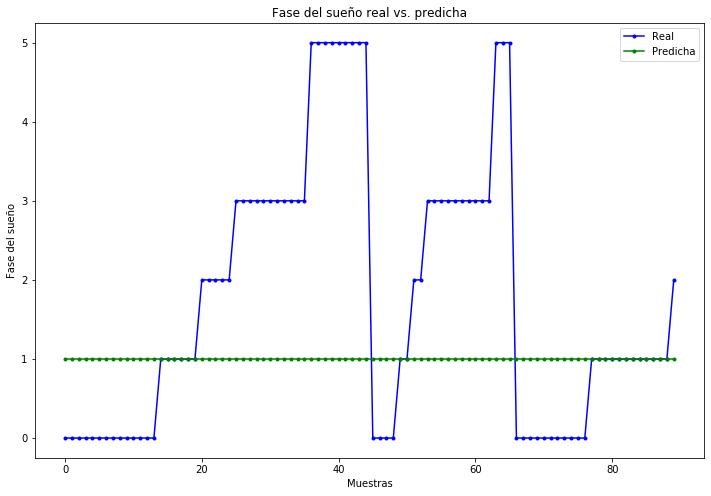

In [11]:
plt.figure(figsize=(12,8))
plt.plot(y_test_multi[0:90],color='blue', marker='.',label='Real')
plt.plot(predictions[0:90],color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

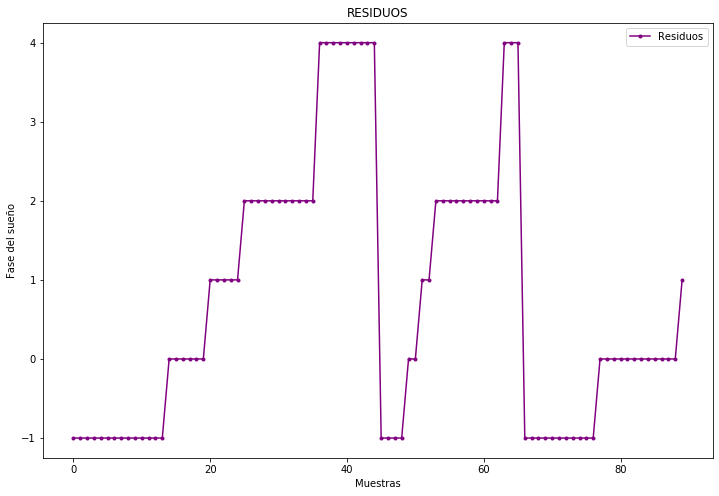

In [12]:
residuos= y_test_multi - predictions
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()